<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

% matplotlib inline


In [158]:
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
df = X.join(y)

- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [57]:
#df.shape
df.shape

(506, 14)

In [58]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [59]:
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [60]:
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [37]:
#Number of unique values for each column
#df.apply(pd.Series.value_counts)
for col in df.columns:
    print ("Col: {} \n Value Counts: \n {} \n".format(col, df[col].value_counts()))


Col: CRIM 
 Value Counts: 
 14.33370    2
0.01501     2
0.08265     1
0.97617     1
0.14103     1
0.03502     1
0.03615     1
0.66351     1
0.12650     1
0.10469     1
0.25356     1
0.10000     1
0.05515     1
0.11027     1
4.26131     1
0.34109     1
22.59710    1
0.28955     1
4.34879     1
0.10574     1
3.47428     1
0.02009     1
0.14866     1
5.66637     1
15.87440    1
0.04297     1
0.78570     1
0.29090     1
1.23247     1
2.44953     1
           ..
9.18702     1
0.05602     1
1.83377     1
15.86030    1
7.67202     1
51.13580    1
15.17720    1
8.05579     1
10.06230    1
41.52920    1
0.32264     1
0.04379     1
0.22212     1
0.13117     1
0.51183     1
6.28807     1
0.08826     1
24.80170    1
0.09065     1
23.64820    1
3.56868     1
12.80230    1
0.72580     1
0.03113     1
13.67810    1
0.88125     1
0.01951     1
0.49298     1
0.26838     1
0.03578     1
Name: CRIM, Length: 504, dtype: int64 

Col: ZN 
 Value Counts: 
 0.0      372
20.0      21
80.0      15
12.5      10


- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [19]:
null_pred = y - np.mean(y)
null_mse = metrics.mean_squared_error(null_pred, y)
print(null_mse)

507.72736083988303


- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linreg = LinearRegression()
model = linreg.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
y_test_pred = model.predict(X_test)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
print (train_mse, test_mse)

21.38900316109355 24.753484525964748


- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [82]:
kf = model_selection.KFold(n_splits=10, shuffle=True)

train_mse_values = []
test_mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index, :], y.iloc[train_index, :])
    
    train_mse_values.append(metrics.mean_squared_error(y.iloc[train_index, :], lr.predict(X.iloc[train_index, :])))
    test_mse_values.append(metrics.mean_squared_error(y.iloc[test_index, :], lr.predict(X.iloc[test_index, :])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('Train MSE: {} Test MSE: {}'.format(train_mse_values[n-1], test_mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: Train: {} Test: {}'.format(np.mean(train_mse_values), np.mean(test_mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
Train MSE: 22.380983399035063 Test MSE: 17.942217873022546
R2: 0.7401834487224115

Model 2
Train MSE: 22.80806194491871 Test MSE: 14.340284715074613
R2: 0.7399347813878847

Model 3
Train MSE: 22.008185100679693 Test MSE: 21.670812129180867
R2: 0.7397027169287747

Model 4
Train MSE: 22.866573581632977 Test MSE: 13.478472802443008
R2: 0.7403404722997684

Model 5
Train MSE: 21.477778656591717 Test MSE: 27.09974911769469
R2: 0.7388706959398553

Model 6
Train MSE: 22.21232794784088 Test MSE: 20.47878800641785
R2: 0.738951440047537

Model 7
Train MSE: 20.56679806839919 Test MSE: 36.70305145616394
R2: 0.7374863062667336

Model 8
Train MSE: 21.201195459371068 Test MSE: 28.95231880735074
R2: 0.7397863985664732

Model 9
Train MSE: 21.25033634240636 Test MSE: 29.01174723000708
R2: 0.7391922537898644

Model 10
Train MSE: 21.193183682836786 Test MSE: 29.931432913357007
R2: 0.7387258586774089

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all fold

- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

In [ ]:
#Null Model MSE: 507.73
#Train Model MSE: 21.80
    
#So null model is worst then full model train using K-fold validation.
#Compared to null model bias and variance both are low on training set. 

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

In [ ]:
#Varience = Test MSE - Train MSE = 2.164. Which is pretty Low and R2 (bias) is 0.73 which is not bad. 

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

In [ ]:
#Variance of model is low but R2 indicated we have small bias problem, 
#since only 73% of variability in data is explained by the model.

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


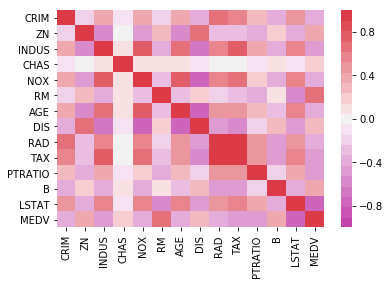

In [24]:
# Visualize correlation matrix in Seaborn using a heat map.
sns.heatmap(df.corr(),
            vmin=-1, vmax=1,
            cmap=sns.diverging_palette(320, 10, n=21))

df.corr()

#Checking Correlation: 
#LSTAT is highly correlated Y but also with INDUS, RM and AGE. So not including those.
#PTRATIO is highly correlated Y. So including it. 
#Rest of the variable explains some variability in Y so including those.


~~~~ CROSS VALIDATION each fold ~~~~
Model 1
Train MSE: 28.046060631070286 Test MSE: 22.492444800415207
R2: 0.6744082758855572

Model 2
Train MSE: 26.360177789195138 Test MSE: 38.719758240292215
R2: 0.6729915731543729

Model 3
Train MSE: 26.207695701527523 Test MSE: 39.70084523163943
R2: 0.6734444193841809

Model 4
Train MSE: 27.704195726577773 Test MSE: 25.658836542243307
R2: 0.6742692786426676

Model 5
Train MSE: 27.781716983645495 Test MSE: 25.428806236321492
R2: 0.673718186228518

Model 6
Train MSE: 26.261163910081773 Test MSE: 38.574361738238
R2: 0.6742198289310406

Model 7
Train MSE: 28.677145503677853 Test MSE: 16.92338910535044
R2: 0.674060035645107

Model 8
Train MSE: 28.54528076546924 Test MSE: 18.005529378596563
R2: 0.6742010428860745

Model 9
Train MSE: 26.0571219490954 Test MSE: 40.856906905975634
R2: 0.6740144991789232

Model 10
Train MSE: 28.406799385747675 Test MSE: 19.460741808139986
R2: 0.6739759973330661

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all fold

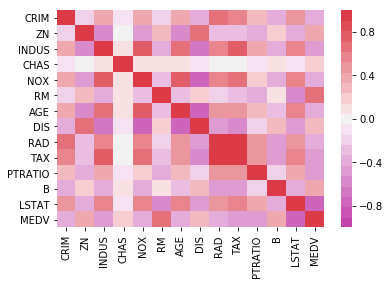

In [22]:
corr_col = ['LSTAT', 'PTRATIO', 'CHAS', 'CRIM', 'B', 'RAD', 'DIS', 'NOX']

X_new = X.loc[:, corr_col]
kf = model_selection.KFold(n_splits=10, shuffle=True)

train_mse_values = []
test_mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X_new, y):
    lr = LinearRegression().fit(X_new.iloc[train_index, :], y.iloc[train_index, :])
    
    train_mse_values.append(metrics.mean_squared_error(y.iloc[train_index, :], lr.predict(X_new.iloc[train_index, :])))
    test_mse_values.append(metrics.mean_squared_error(y.iloc[test_index, :], lr.predict(X_new.iloc[test_index, :])))
    scores.append(lr.score(X_new, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('Train MSE: {} Test MSE: {}'.format(train_mse_values[n-1], test_mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: Train: {} Test: {}'.format(np.mean(train_mse_values), np.mean(test_mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

In [ ]:
#Observation
# - The variance has reduced from 2.164 to 1.177
# - Bias is increased. R2 value reduced from 0.74 to 0.67
# - Overall Model is not better then previous model.

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

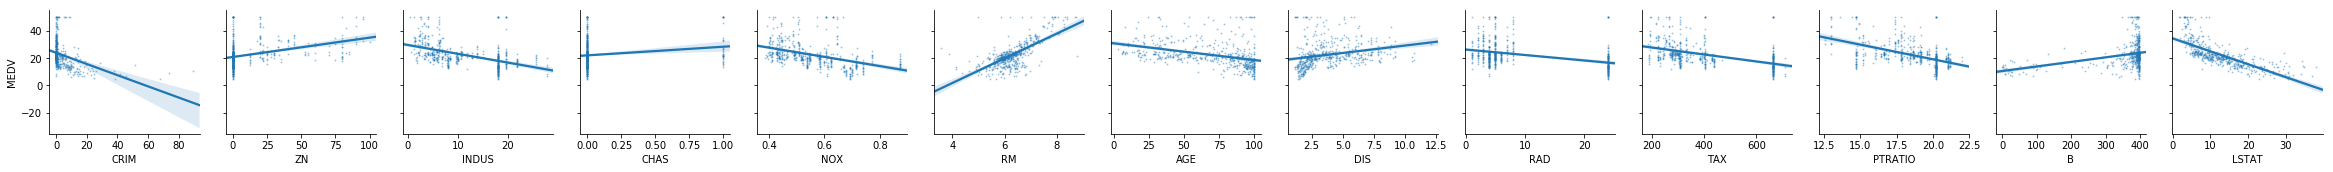

In [26]:
g = sns.pairplot(df, x_vars=X.columns, y_vars = 'MEDV', 
                 kind='reg', plot_kws={'scatter_kws': {'s': 1, 'alpha': .3}})


In [30]:
# - As per pair plot, there is some non-linear relationship between LSTAT, B, DIS, CRIM, RAD and MEDV
# - Taking Log of DIS and Squaring LSTAT
# - Done as per bulging rule.
X.loc[:, 'LSTAT_2'] = np.square(X.loc[:, 'LSTAT'])
X.loc[:, 'DIS_LOG'] = np.log(X.loc[:, 'DIS'])

X_new = X.loc[:, corr_col]
kf = model_selection.KFold(n_splits=10, shuffle=True)

train_mse_values = []
test_mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X_new, y):
    lr = LinearRegression().fit(X_new.iloc[train_index, :], y.iloc[train_index, :])
    
    train_mse_values.append(metrics.mean_squared_error(y.iloc[train_index, :], lr.predict(X_new.iloc[train_index, :])))
    test_mse_values.append(metrics.mean_squared_error(y.iloc[test_index, :], lr.predict(X_new.iloc[test_index, :])))
    scores.append(lr.score(X_new, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('Train MSE: {} Test MSE: {}'.format(train_mse_values[n-1], test_mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: Train: {} Test: {}'.format(np.mean(train_mse_values), np.mean(test_mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
Train MSE: 20.60083327710114 Test MSE: 25.165693256437116
R2: 0.7505207463891592

Model 2
Train MSE: 20.84409723130905 Test MSE: 22.685517265231944
R2: 0.7508907193990685

Model 3
Train MSE: 21.16794169957694 Test MSE: 20.002446995402313
R2: 0.7506446154427575

Model 4
Train MSE: 21.50936064346309 Test MSE: 16.534466036583932
R2: 0.7511484374437631

Model 5
Train MSE: 21.082232676409603 Test MSE: 20.457391667910436
R2: 0.7510143906559347

Model 6
Train MSE: 21.559528511290722 Test MSE: 16.283307235559228
R2: 0.7509139301927952

Model 7
Train MSE: 20.664126912704145 Test MSE: 24.916557541695838
R2: 0.7502435628927082

Model 8
Train MSE: 20.314455997663543 Test MSE: 28.325477486076885
R2: 0.7499861421624294

Model 9
Train MSE: 20.950158011040568 Test MSE: 21.685600094775932
R2: 0.7509720364460033

Model 10
Train MSE: 20.4935406363602 Test MSE: 26.517648645206474
R2: 0.7501904868209031

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all 

In [ ]:
#Observation
# After squaring and taking log. Bias is reduced and variance is also lower then original model with all variables
# R2 = 0.75 and Variance = 1.33
# So this model is way better since 
#    - there is no multi-colinearity as original model with all variables
#    - Bias and variance is also way better then reduced and full model. 

# KNN Practice

In [6]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [7]:
iris.head()

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [11]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [39]:
iris.loc[:, 'species_num'] = iris.loc[:, 'species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

In [65]:
print(iris.shape)
print("=================")
print(iris.dtypes)
print("=================")
print(iris.isnull().sum())
print("=================")
print(iris.describe())
print("=================")
print(iris.groupby('species').describe())

(150, 6)
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_num     0
dtype: int64
       sepal_length  sepal_width  petal_length  petal_width  species_num
count    150.000000   150.000000    150.000000   150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667     1.000000
std        0.828066     0.433594      1.764420     0.763161     0.819232
min        4.300000     2.000000      1.000000     0.100000     0.000000
25%        5.100000     2.800000      1.600000     0.300000     0.000000
50%        5.800000     3.000000      4.350000     1.300000     1.000000
75%        6.400000     3.300000      5.100000     1.800000     2.000000
max        7.900000     4.400000      6.900000     2.500000     2.000000
                petal_length                           

In [41]:
for col in iris.columns:
    print ("Col: {} \n Value Counts: \n {} \n".format(col, iris[col].value_counts()))

Col: sepal_length 
 Value Counts: 
 5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: sepal_length, dtype: int64 

Col: sepal_width 
 Value Counts: 
 3.0    26
2.8    14
3.2    13
3.4    12
3.1    12
2.9    10
2.7     9
2.5     8
3.5     6
3.8     6
3.3     6
2.6     5
2.3     4
3.6     3
2.4     3
2.2     3
3.7     3
3.9     2
4.2     1
4.1     1
4.4     1
2.0     1
4.0     1
Name: sepal_width, dtype: int64 

Col: petal_length 
 Value Counts: 
 1.5    14
1.4    12
5.1     8
4.5     8
1.3     7
1.6     7
5.6     6
4.0     5
4.9     5
4.7     5
4.8     4
1.7     4
4.4     4
4.2     4
5.0     4
4.1     3
5.5     3
4.6     3
6.1     3
5.7     3
3.9     3
5.8     3
1.2     2
1.9     2
6.7 

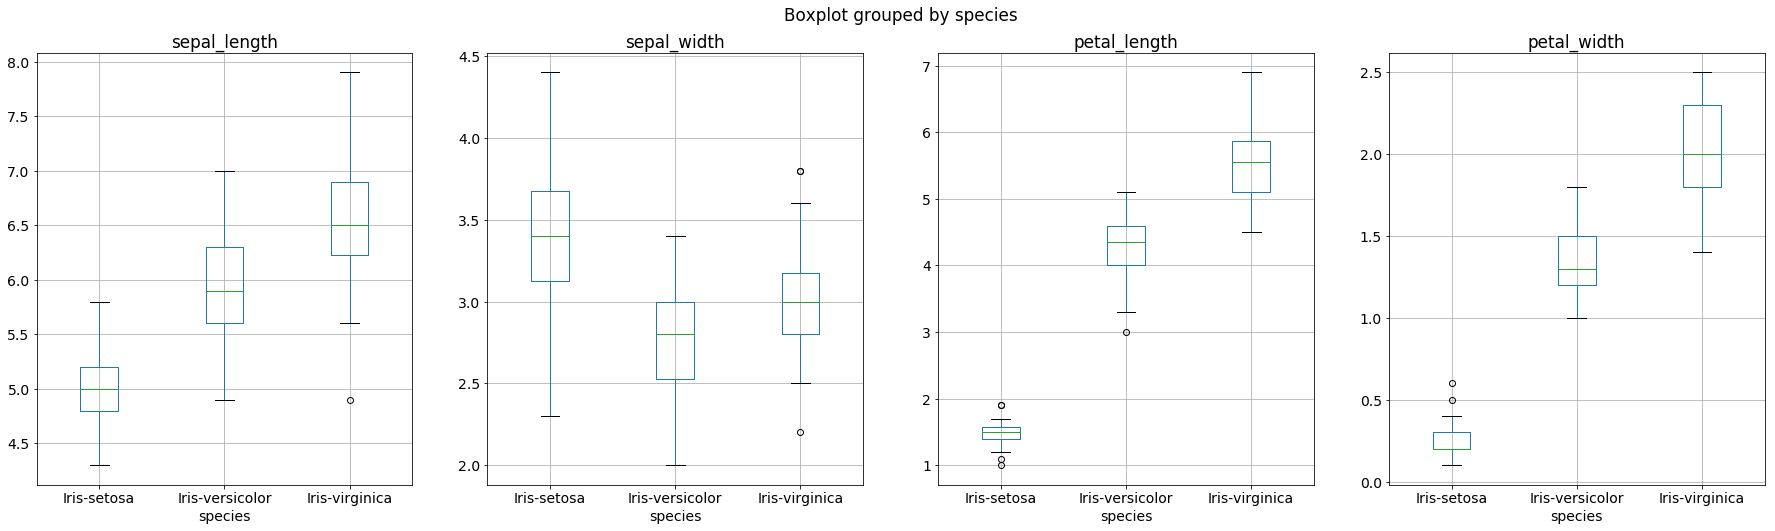

In [34]:
# Box plot of X, grouped by species.
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(30,8))
iris.boxplot('sepal_length', by='species', ax =ax0);
iris.boxplot('sepal_width', by='species', ax =ax1);
iris.boxplot('petal_length', by='species', ax =ax2);
iris.boxplot('petal_width', by='species', ax =ax3);

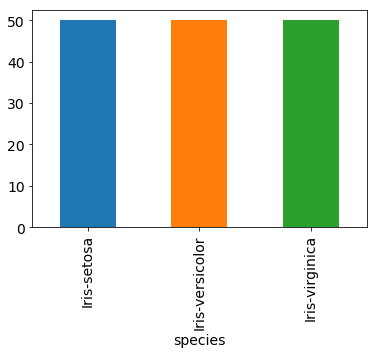

In [79]:
fig, ax = plt.subplots()
iris.groupby('species').size().plot(kind='bar', ax=ax);

- Get the accuracy of a null model that simply predicts the most common species.

In [84]:
common_class = iris['species'].value_counts().index[0]
print ("Common species: {}".format(common_class))
#accuracy
print("Accuracy of NULL model: {}".format(iris['species'].value_counts()[common_class] / len(iris['species'])))

Common species: Iris-versicolor
Accuracy of NULL model: 0.3333333333333333


- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [109]:
X = iris.iloc[:, :-2]
y = iris.loc[:, 'species_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))


0.9210526315789473


In [116]:
### Cross validation
kf = model_selection.KFold(n_splits=10, shuffle=True)

train_accuracy = []
test_accuracy = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    Xtrain = X.iloc[train_index, :]
    ytrain = y[train_index]
    model = KNeighborsClassifier(n_neighbors=10).fit(Xtrain, ytrain)
    y_train_pred_class = model.predict(X.iloc[train_index, :])
    train_accuracy.append(metrics.accuracy_score(ytrain, y_train_pred_class))
    
    y_pred_class = model.predict(X.iloc[test_index, :])
    test_accuracy.append(metrics.accuracy_score(y[test_index], y_pred_class))
    
    n += 1
    
    print('Model {}'.format(n))
    print('Accuracy Test {}'.format(test_accuracy[n-1]))

print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of Accuracy for all folds: Train: {} Test: {}'.format(np.mean(train_accuracy), np.mean(test_accuracy)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
Accuracy Test 1.0
Model 2
Accuracy Test 1.0
Model 3
Accuracy Test 1.0
Model 4
Accuracy Test 1.0
Model 5
Accuracy Test 1.0
Model 6
Accuracy Test 0.8666666666666667
Model 7
Accuracy Test 0.9333333333333333
Model 8
Accuracy Test 1.0
Model 9
Accuracy Test 0.9333333333333333
Model 10
Accuracy Test 0.9333333333333333
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of Accuracy for all folds: Train: 0.9762962962962962 Test: 0.9666666666666666


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

In [ ]:
#Accuracy of NULL model: 0.33
#Accuracy of simple train test model: 0.92
#Accuracy of 10 fold cross validation with k = 10: 0.96 (Test)
#Overall much better model compared to NULL model. With low variance and high accuracy.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

In [ ]:
#On Training set model accuracy is slightly higher then on test. But overall not much difference.
# Since there very slight difference, variance is low and so is bias.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

In [ ]:
# Variance is low but there is slight bias since accuracy rate is not close to 100% for such perfectly balanced data set.

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

In [153]:
print("~~~~ CROSS VALIDATION each fold ~~~~")
train_accuracy = {}
test_accuracy = {}
kf = model_selection.KFold(n_splits=10, shuffle=True)
for k in range(1, 80):
    train_accuracy[k] = []
    test_accuracy[k] = []
    n = 0
    for train_index, test_index in kf.split(X, y):
        Xtrain = X.iloc[train_index, :]
        ytrain = y[train_index]
        model = KNeighborsClassifier(n_neighbors=k).fit(Xtrain, ytrain)
        y_train_pred_class = model.predict(X.iloc[train_index, :])
        train_accuracy[k].append(metrics.accuracy_score(ytrain, y_train_pred_class))

        y_pred_class = model.predict(X.iloc[test_index, :])
        test_accuracy[k].append(metrics.accuracy_score(y[test_index], y_pred_class))

        n += 1

~~~~ CROSS VALIDATION each fold ~~~~


In [154]:
print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
scores = []
for k, v in test_accuracy.items():
    acc = np.mean(v)
    print('Mean of Accuracy for k: {} Test: {}'.format(k, acc))
    scores.append([k, acc])

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of Accuracy for k: 1 Test: 0.9533333333333335
Mean of Accuracy for k: 2 Test: 0.9466666666666667
Mean of Accuracy for k: 3 Test: 0.96
Mean of Accuracy for k: 4 Test: 0.96
Mean of Accuracy for k: 5 Test: 0.96
Mean of Accuracy for k: 6 Test: 0.9533333333333334
Mean of Accuracy for k: 7 Test: 0.9666666666666666
Mean of Accuracy for k: 8 Test: 0.9733333333333334
Mean of Accuracy for k: 9 Test: 0.96
Mean of Accuracy for k: 10 Test: 0.9600000000000002
Mean of Accuracy for k: 11 Test: 0.9666666666666668
Mean of Accuracy for k: 12 Test: 0.9733333333333334
Mean of Accuracy for k: 13 Test: 0.9666666666666666
Mean of Accuracy for k: 14 Test: 0.9733333333333334
Mean of Accuracy for k: 15 Test: 0.9733333333333334
Mean of Accuracy for k: 16 Test: 0.9733333333333334
Mean of Accuracy for k: 17 Test: 0.9733333333333334
Mean of Accuracy for k: 18 Test: 0.9666666666666668
Mean of Accuracy for k: 19 Test: 0.9333333333333333
Mean of Accuracy for k: 20 Test: 0.96
M

In [ ]:
# Choosing K = 13 gives best Test accuracy.

- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

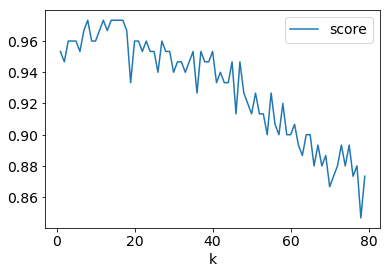

In [155]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');
#Higher K values decreases the accuracy rate.

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [159]:
# First, format our data in a DataFrame
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [201]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Thu, 07 Jun 2018   Prob (F-statistic):          1.59e-321
Time:                        13:13:06   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

In [214]:
X = df.iloc[:, :-1]
y = df.loc[:, 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

X_train.loc[:, 'MEDV'] = y_train[:]
# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=X_train)
result = model.fit()
predictions = result.predict(X_test)
print("Train_Test R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))


Train_Test R^2 Score: 0.7248936952173757


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [233]:
X = df.iloc[:, :-1]
y = df.loc[:, 'MEDV']

kf = model_selection.KFold(n_splits=10, shuffle=True)

scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    X.loc[:, 'MEDV'] = y[:]
    model = smf.ols(formula=formulas['case1'], data=X.iloc[train_index, :])
    result = model.fit()
    predictions = result.predict(X.iloc[test_index, :])
    
    scores.append(metrics.r2_score(y.iloc[test_index], predictions))
    
    n += 1

print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of R2 for all folds: 0.6436457546701599


In [ ]:
## For some reason cannot beat original full model which is without train and test.

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

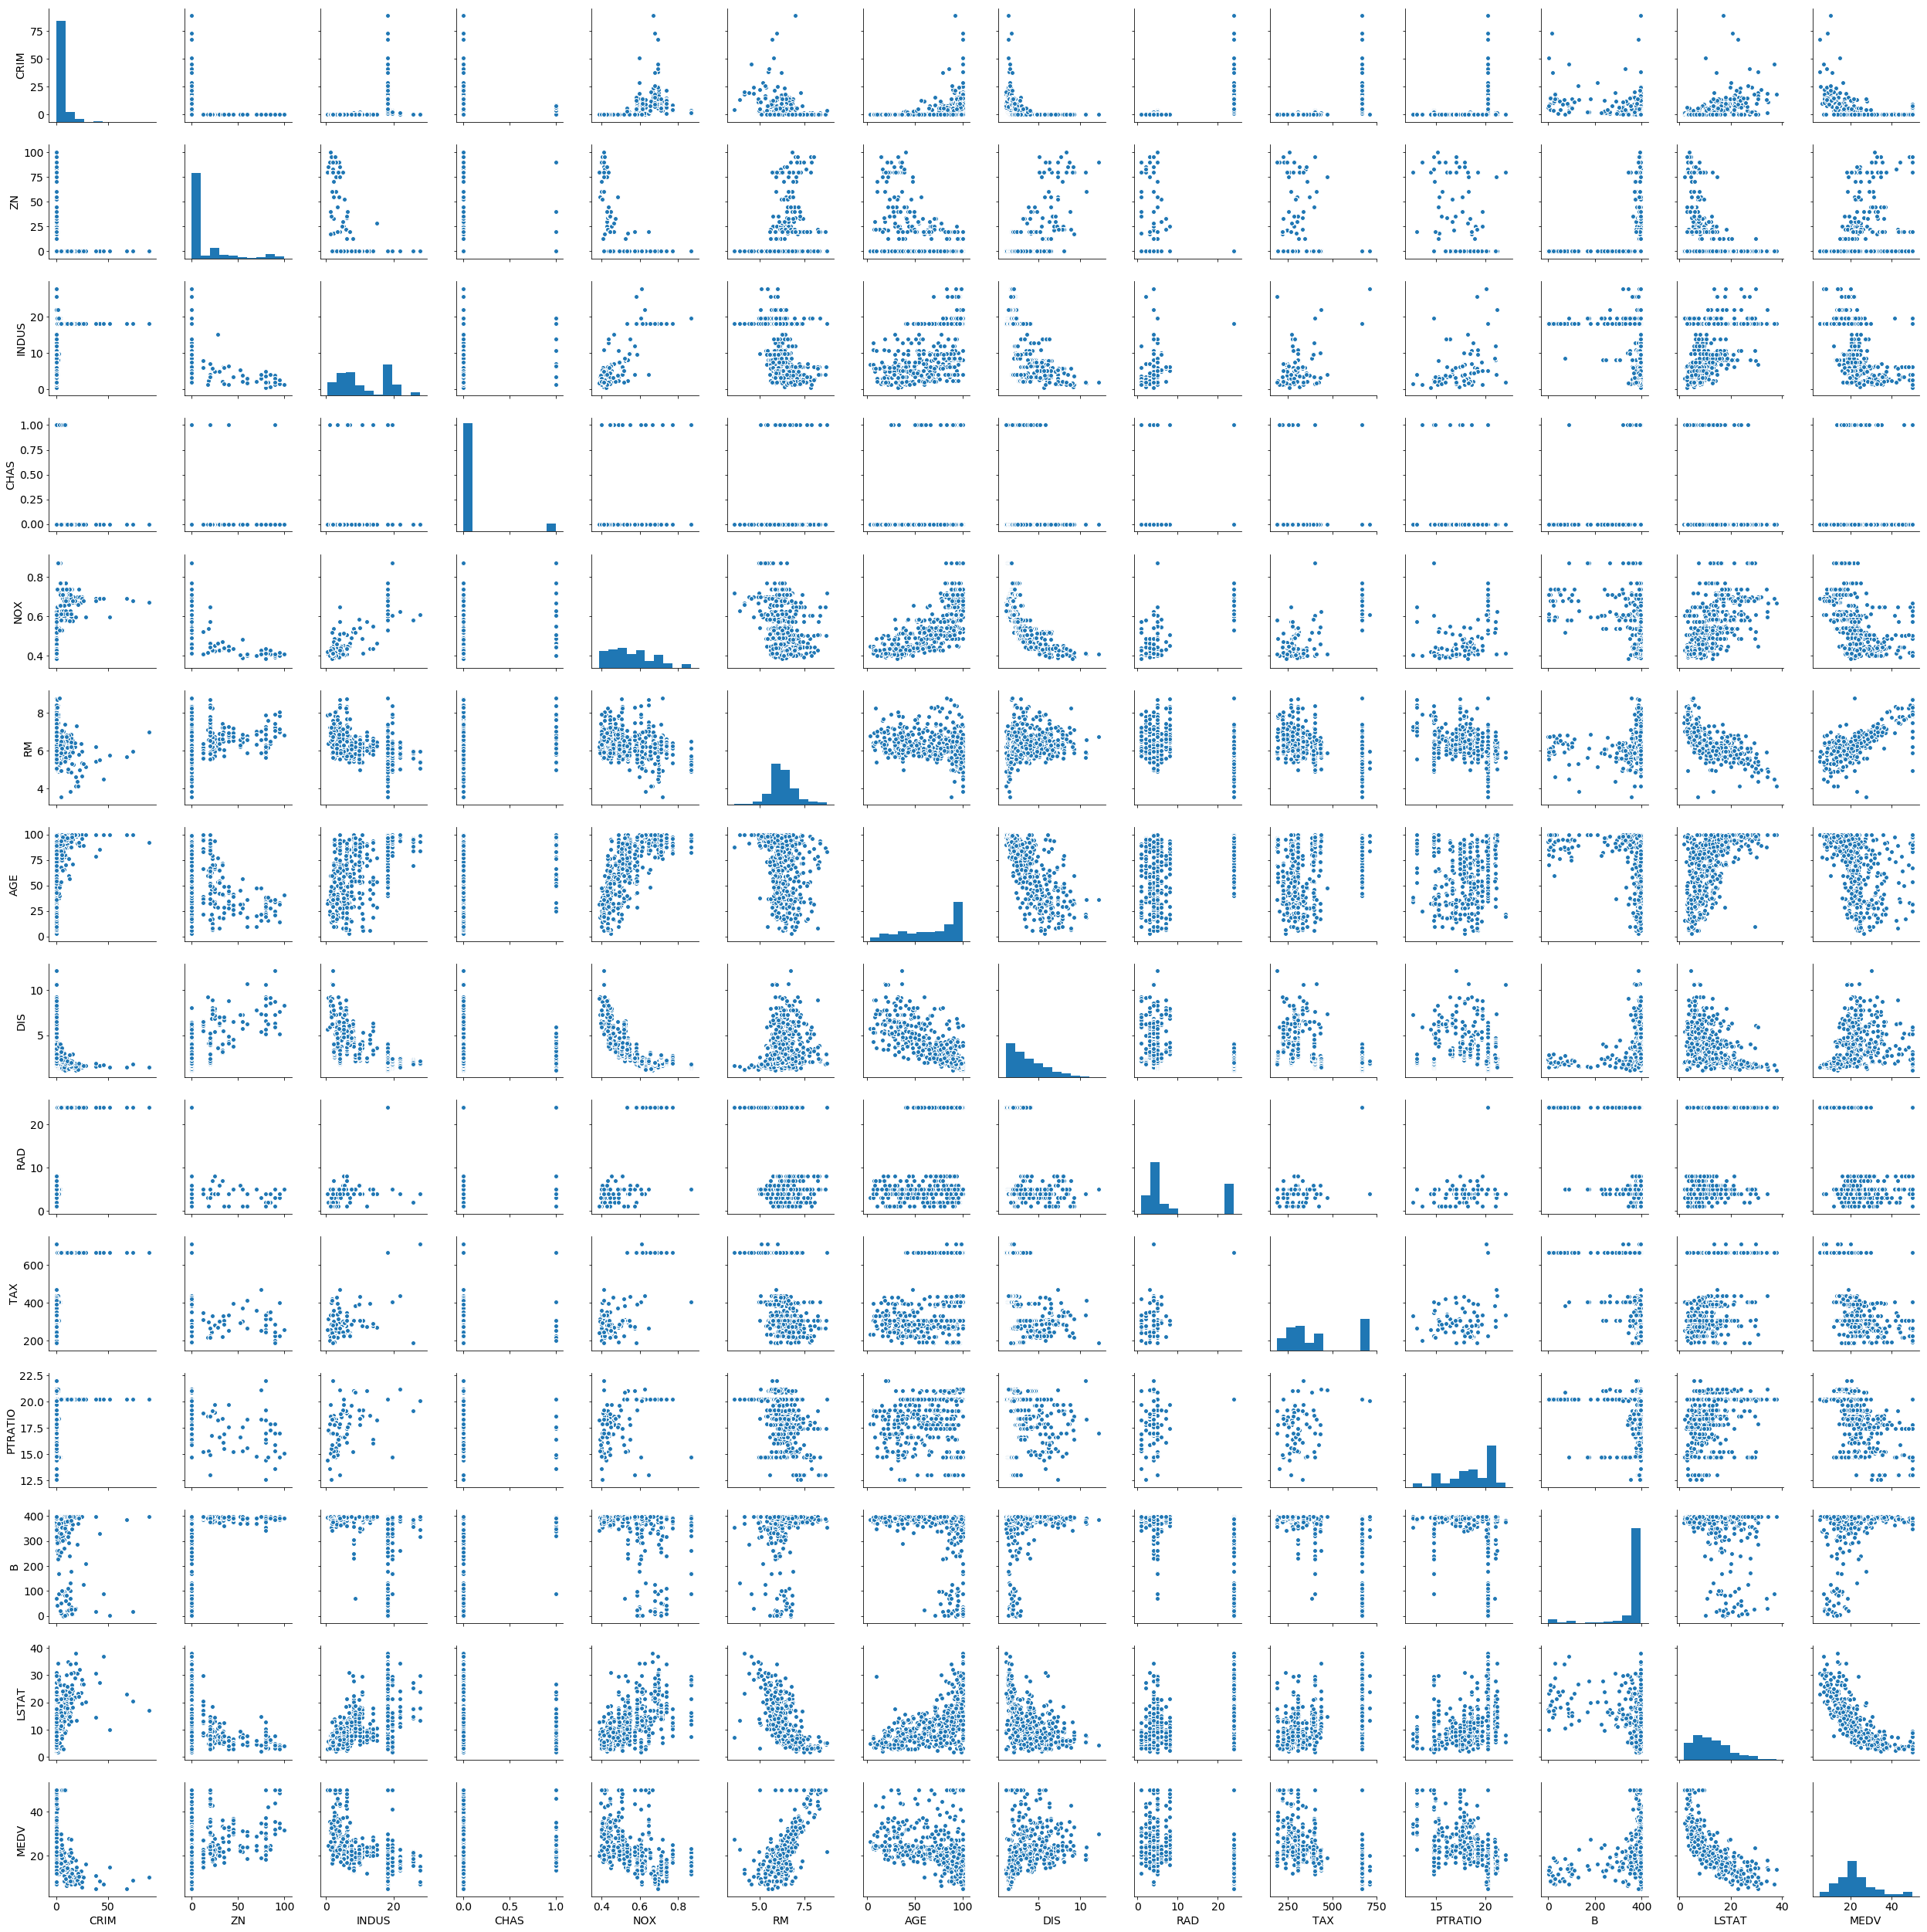

In [234]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [235]:
# Check out Pearson scores
df.corr()

##from correlation matrix we can use "PTRATIO" since that's highly correlated 
## and not correlated with LSTAT or other variable used in the model. (avoid multicolinearity)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## Demo: Patsy

In [9]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [10]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


/Users/greg/anaconda3/envs/ga/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.40402292728493383
